## Favre Victor et Badiel Dane

In [125]:
import numpy as np
np.set_printoptions(threshold=10000,suppress=True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from sklearn.pipeline import Pipeline

(4375, 14)


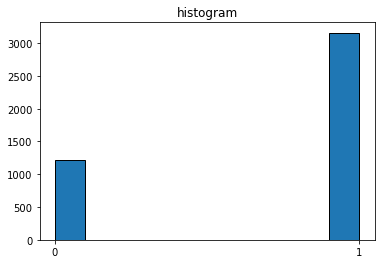

In [126]:
data = pd.read_csv("credit_scoring.csv",sep = ';')
data_ar = data.to_numpy()
print(np.shape(data_ar))

positive = data_ar[data_ar[:,13] == 1]
negative = data_ar[data_ar[:,13] == 0]

plt.hist(data_ar[:,13], ec="k")
plt.xticks((0,1))
plt.title("histogram")
plt.show()

In [127]:
from sklearn.model_selection import train_test_split
X = data_ar[:,:13]
y = data_ar[:,13]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

In [128]:
from sklearn import tree
from sklearn import metrics

clf = tree.DecisionTreeClassifier(random_state=1)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.51      0.54      0.52       604
         1.0       0.82      0.80      0.81      1584

    accuracy                           0.73      2188
   macro avg       0.66      0.67      0.67      2188
weighted avg       0.73      0.73      0.73      2188



KNeighbors

In [129]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.50      0.31      0.39       604
         1.0       0.77      0.88      0.82      1584

    accuracy                           0.72      2188
   macro avg       0.64      0.60      0.60      2188
weighted avg       0.70      0.72      0.70      2188



In [130]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(40,20),activation="relu").fit(X_train, y_train)
y_pred = mlp.predict(X_test)
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.39      0.61      0.47       604
         1.0       0.81      0.63      0.71      1584

    accuracy                           0.63      2188
   macro avg       0.60      0.62      0.59      2188
weighted avg       0.69      0.63      0.64      2188



# normalisation et standardisation

In [131]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train_standar = sc_X.fit_transform(X_train)
X_test_standar = sc_X.transform(X_test)
#TODO copy the algo when done

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_minmax = scaler.fit_transform(X_train)
X_test_minmax = scaler.transform(X_test)

In [132]:
from sklearn import tree
from sklearn import metrics

clf = tree.DecisionTreeClassifier(random_state=1)
clf = clf.fit(X_train_standar,y_train)
y_pred = clf.predict(X_test_standar)
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.51      0.53      0.52       604
         1.0       0.82      0.80      0.81      1584

    accuracy                           0.73      2188
   macro avg       0.66      0.67      0.66      2188
weighted avg       0.73      0.73      0.73      2188



In [133]:
clf = tree.DecisionTreeClassifier(random_state=1)
clf = clf.fit(X_train_minmax,y_train)
y_pred = clf.predict(X_test_minmax)
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.51      0.54      0.52       604
         1.0       0.82      0.80      0.81      1584

    accuracy                           0.73      2188
   macro avg       0.66      0.67      0.67      2188
weighted avg       0.73      0.73      0.73      2188



In [134]:
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.50      0.31      0.39       604
         1.0       0.77      0.88      0.82      1584

    accuracy                           0.72      2188
   macro avg       0.64      0.60      0.60      2188
weighted avg       0.70      0.72      0.70      2188



In [135]:
neigh.fit(X_train, y_train)
y_pred = clf.predict(X_test_minmax)
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.51      0.54      0.52       604
         1.0       0.82      0.80      0.81      1584

    accuracy                           0.73      2188
   macro avg       0.66      0.67      0.67      2188
weighted avg       0.73      0.73      0.73      2188



In [136]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.51      0.54      0.52       604
         1.0       0.82      0.80      0.81      1584

    accuracy                           0.73      2188
   macro avg       0.66      0.67      0.67      2188
weighted avg       0.73      0.73      0.73      2188



In [137]:
mlp = MLPClassifier(hidden_layer_sizes=(40,20),activation="relu")
mlp.fit(X_train_standar, y_train)
y_pred = mlp.predict(X_test_standar)
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.61      0.56      0.58       604
         1.0       0.84      0.87      0.85      1584

    accuracy                           0.78      2188
   macro avg       0.72      0.71      0.72      2188
weighted avg       0.78      0.78      0.78      2188



In [138]:
mlp.fit(X_train_minmax, y_train)
y_pred = mlp.predict(X_test_minmax)
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.65      0.52      0.58       604
         1.0       0.83      0.89      0.86      1584

    accuracy                           0.79      2188
   macro avg       0.74      0.71      0.72      2188
weighted avg       0.78      0.79      0.78      2188



PCA

In [139]:
from sklearn.decomposition import PCA
pca = PCA()
pca_train = pca.fit_transform(X_train_standar)
X_train_pca = np.concatenate([X_train_standar,pca_train[:,:3]], axis = 1)
pca_test = pca.transform(X_test_standar)
X_test_pca = np.concatenate([X_test_standar,pca_test[:,:3]], axis = 1)

In [140]:
clf = tree.DecisionTreeClassifier(random_state=1)
clf = clf.fit(X_train_pca, y_train)
y_pred = clf.predict(X_test_pca)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.52      0.58      0.55       604
         1.0       0.83      0.80      0.81      1584

    accuracy                           0.74      2188
   macro avg       0.68      0.69      0.68      2188
weighted avg       0.75      0.74      0.74      2188



In [141]:
neigh.fit(X_train_pca, y_train)
y_pred = neigh.predict(X_test_pca)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.57      0.47      0.52       604
         1.0       0.81      0.87      0.84      1584

    accuracy                           0.76      2188
   macro avg       0.69      0.67      0.68      2188
weighted avg       0.74      0.76      0.75      2188



In [142]:
mlp = MLPClassifier(hidden_layer_sizes=(40,20),activation="relu")
mlp.fit(X_train_pca, y_train)
y_pred = mlp.predict(X_test_pca)
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.61      0.54      0.57       604
         1.0       0.83      0.86      0.85      1584

    accuracy                           0.78      2188
   macro avg       0.72      0.70      0.71      2188
weighted avg       0.77      0.78      0.77      2188



# Sélection de variables

Index(['Income', 'Seniority', 'Price', 'Amount', 'Age', 'Assets', 'Expenses',
       'Records', 'Time', 'Job', 'Debt', 'Home', 'Marital'],
      dtype='object')


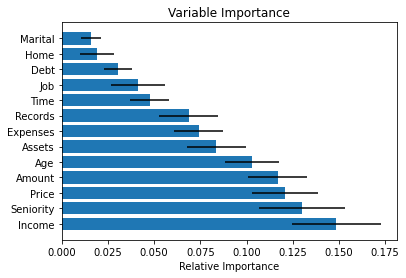

In [143]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train_standar,y_train)
importances=clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],axis=0)
sorted_idx = np.argsort(importances)[::-1]
nom_cols = data.columns
features = nom_cols #see if it's well organized
print(features[sorted_idx])
padding = np.arange(X_train_standar.size/len(X_train_standar)) + 0.5
plt.barh(padding, importances[sorted_idx],xerr=std[sorted_idx], align='center')
plt.yticks(padding, features[sorted_idx])
plt.xlabel("Relative Importance")
plt.title("Variable Importance")
plt.show()

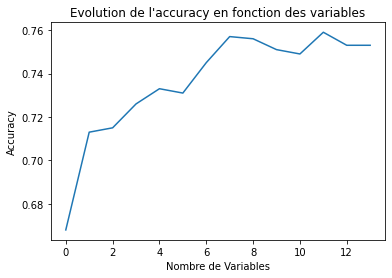

In [144]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier(n_neighbors=5)
scores=np.zeros(X_train_standar.shape[1]+1)
for f in np.arange(0, X_train_standar.shape[1]+1):
    X1_f = X_train_standar[:,sorted_idx[:f+1]]
    X2_f = X_test_standar[:,sorted_idx[:f+1]]
    KNN.fit(X1_f,y_train)
    YKNN=KNN.predict(X2_f)
    scores[f]=np.round(metrics.accuracy_score(y_test,YKNN),3)
plt.plot(scores)
plt.xlabel("Nombre de Variables")
plt.ylabel("Accuracy")
plt.title("Evolution de l'accuracy en fonction des variables")
plt.show()

Suite au graph précedent on peut conclure que la nombre optimale de variable est de 7 car l'ajout de variable entraien ou une perte d'accuracy de l'odre de 0.01 ou aucune amélioration

retest with only the 7 best features

In [193]:
X_train_best = X_train_standar[:,sorted_idx[:7]]
X_test_best = X_test_standar[:,sorted_idx[:7]]

(2188, 7)


# GridSearch

### Decision tree grid search

In [145]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'max_depth':[2,3,4,5,6,7],
    'min_samples_leaf' : [1,2,3]
}

clf = tree.DecisionTreeClassifier(random_state=1)
'''
clf = clf.fit(X_train_pca, y_train)
y_pred = clf.predict(X_test_pca)
print(metrics.classification_report(y_test, y_pred))
'''
clf = GridSearchCV(clf, parameters, scoring='accuracy',cv=10, verbose=False)
clf.fit(X_train_pca, y_train)
scoring = clf.cv_results_
clf.best_params_

{'max_depth': 4, 'min_samples_leaf': 1}

### grid search KN neighbours

In [146]:
parameters = {
    'n_neighbors':[2,3,4,5,6,7,8,9,10],
    'leaf_size' : [1,2,3,4,5,10,30,40],
    'p':[1,2],
    'algorithm':['ball_tree', 'kd_tree', 'brute']
}
neigh = KNeighborsClassifier()
'''
clf = clf.fit(X_train_pca, y_train)
y_pred = clf.predict(X_test_pca)
print(metrics.classification_report(y_test, y_pred))
'''
clf = GridSearchCV(neigh, parameters, scoring='accuracy',cv=10, verbose=False)
clf.fit(X_train_pca, y_train)
scoring = clf.cv_results_
clf.best_params_

{'algorithm': 'ball_tree', 'leaf_size': 1, 'n_neighbors': 9, 'p': 2}

### GridSearch multi layer perceptron

In [147]:

parameters = {
    'activation' : ["identity","logistic","tanh","relu"],
    'hidden_layer_sizes':[(80,40),(50,15),(60,40),(60,30)],
    'alpha':[0.001,0.00005,0.0001,0.0005]
}

mlp = MLPClassifier(random_state = 1,solver = 'adam',learning_rate = "adaptive")
'''
mlp.fit(X_train_pca, y_train)
y_pred = mlp.predict(X_test_pca)
'''
clf = GridSearchCV(mlp, parameters, scoring='accuracy',cv=10, verbose=False)
clf.fit(X_train_pca, y_train)
scoring = clf.cv_results_
clf.best_params_

{'activation': 'identity', 'alpha': 0.001, 'hidden_layer_sizes': (60, 40)}

# Pipeline

In [162]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
import pickle

pipe = Pipeline([
    ('scaler',StandardScaler),
    ('pca', PCA(n_components = 3)),
    ('tree', tree.DecisionTreeClassifier(random_state=1, max_depth= 4, min_samples_leaf= 1))
])

with open('pipeline.pickle', 'wb') as handle:
    pickle.dump(pipe, handle, protocol=pickle.HIGHEST_PROTOCOL)

# or if we can use joblib
#import joblib
#from sklearn.externals import joblib
#joblib.dump(pipeline, 'pipeline.pkl')

# Comparaison d'algorithmes

In [172]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

clfs = {
    'TREE': tree.DecisionTreeClassifier(max_depth= 4, min_samples_leaf= 1, random_state=1),
    'KNN': KNeighborsClassifier(algorithm= 'ball_tree', leaf_size= 1, n_neighbors= 9, p= 2),
    'Bayes': GaussianNB(),
    'CART': tree.DecisionTreeClassifier(random_state=1),
    'ID30': tree.DecisionTreeClassifier(random_state=1,criterion = "entropy"),
    'MLP': MLPClassifier(random_state = 1,solver = 'adam',learning_rate = "adaptive"),
    'neihgbors':KNeighborsClassifier(),
    'bagging':BaggingClassifier(n_estimators=50, random_state=1),
    'ADA': AdaBoostClassifier(n_estimators=50, random_state=0),
    'RNDForest':RandomForestClassifier(n_estimators=50, max_depth=5, random_state=1)
}
def run_classifiers(_clfs, _X, _y):
    kf = KFold(n_splits=10, shuffle=True, random_state=0)
    for i in _clfs:
        clf = _clfs[i]
        cv_acc = cross_val_score(clf, _X, _y, cv=kf, scoring= "precision")
        auc = cross_val_score(clf, _X, _y, cv=kf, scoring= 'roc_auc')
        print("Accuracy for {0} is: {1:.3f} +/- {2:.3f} roc is: {3:.3f} +/- {4:.3f}".format(i, np.mean(cv_acc), np.std(cv_acc), np.mean(auc), np.std(auc)))

run_classifiers(clfs,X_train_pca,y_train)

Accuracy for TREE is: 0.804 +/- 0.030 roc is: 0.646 +/- 0.028
Accuracy for KNN is: 0.796 +/- 0.032 roc is: 0.766 +/- 0.018
Accuracy for Bayes is: 0.820 +/- 0.032 roc is: 0.773 +/- 0.033
Accuracy for CART is: 0.804 +/- 0.030 roc is: 0.646 +/- 0.028
Accuracy for ID30 is: 0.790 +/- 0.036 roc is: 0.627 +/- 0.032
Accuracy for MLP is: 0.834 +/- 0.029 roc is: 0.834 +/- 0.019
Accuracy for neihgbors is: 0.797 +/- 0.032 roc is: 0.741 +/- 0.019
Accuracy for bagging is: 0.808 +/- 0.030 roc is: 0.792 +/- 0.024
Accuracy for ADA is: 0.815 +/- 0.029 roc is: 0.818 +/- 0.029
Accuracy for RNDForest is: 0.778 +/- 0.034 roc is: 0.818 +/- 0.022


# Données hétérogènes

In [186]:
credit_data = pd.read_csv("credit.data", sep = '\t')
print(credit_data)

     b  30.83       0  u  g   w   v  1.25  t t.1  1  f g.1  202  0.1  +
0    a  58.67   4.460  u  g   q   h  3.04  t   t  6  f   g   43  560  +
1    a  24.50   0.500  u  g   q   h  1.50  t   f  0  f   g  280  824  +
2    b  27.83   1.540  u  g   w   v  3.75  t   t  5  t   g  100    3  +
3    b  20.17   5.625  u  g   w   v  1.71  t   f  0  f   s  120    0  +
4    b  32.08   4.000  u  g   m   v  2.50  t   f  0  t   g  360    0  +
..  ..    ...     ... .. ..  ..  ..   ... ..  .. .. ..  ..  ...  ... ..
682  b  21.08  10.085  y  p   e   h  1.25  f   f  0  f   g  260    0  -
683  a  22.67   0.750  u  g   c   v  2.00  f   t  2  t   g  200  394  -
684  a  25.25  13.500  y  p  ff  ff  2.00  f   t  1  t   g  200    1  -
685  b  17.92   0.205  u  g  aa   v  0.04  f   f  0  f   g  280  750  -
686  b  35.00   3.375  u  g   c   h  8.29  f   f  0  t   g    0    0  -

[687 rows x 16 columns]


In [187]:
data_ar = data.to_numpy()
print(np.shape(data_ar))

(4375, 14)


In [192]:
X = data_ar[:,:13]
y = data_ar[:,13]
number = credit_data.select_dtypes(include='number')


          0  1.25  1  0.1
0     4.460  3.04  6  560
1     0.500  1.50  0  824
2     1.540  3.75  5    3
3     5.625  1.71  0    0
4     4.000  2.50  0    0
..      ...   ... ..  ...
682  10.085  1.25  0    0
683   0.750  2.00  2  394
684  13.500  2.00  1    1
685   0.205  0.04  0  750
686   3.375  8.29  0    0

[687 rows x 4 columns]
